In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import requests
from io import BytesIO
import glob
import os

In [7]:
!git clone https://github.com/SalmaEssa/remove-logo-from-image.git


Cloning into 'remove-logo-from-image'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 35 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (35/35), 3.96 MiB | 8.60 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [8]:
def Process_image(input_path,output_path):
  large_image_path = input_path
  small_image_path = '/content/remove-logo-from-image/logo/logo.PNG'

  large_image = cv2.imread(large_image_path, cv2.IMREAD_COLOR)
  small_image = cv2.imread(small_image_path, cv2.IMREAD_COLOR)

  large_image_gray = cv2.cvtColor(large_image, cv2.COLOR_BGR2GRAY)
  small_image_gray = cv2.cvtColor(small_image, cv2.COLOR_BGR2GRAY)

  sift = cv2.SIFT_create()

  keypoints1, descriptors1 = sift.detectAndCompute(small_image_gray, None)
  keypoints2, descriptors2 = sift.detectAndCompute(large_image_gray, None)

  bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

  matches = bf.match(descriptors1, descriptors2)

  matches = sorted(matches, key=lambda x: x.distance)

  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)

  for i, match in enumerate(matches):
      points1[i, :] = keypoints1[match.queryIdx].pt
      points2[i, :] = keypoints2[match.trainIdx].pt

  H, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

  height, width, channels = small_image.shape
  corners = np.array([
      [0, 0],
      [width, 0],
      [width, height],
      [0, height]
  ], dtype=np.float32)
  projected_corners = cv2.perspectiveTransform(np.array([corners]), H)[0]

  result_image = large_image.copy()
  #cv2.polylines(result_image, [np.int32(projected_corners)], True, (0, 255, 0), 3)
  corner_color = large_image[int(projected_corners[0, 1]), int(projected_corners[0, 0])]
  corner_color = tuple(int(c) for c in corner_color)

  cv2.fillPoly(result_image, [np.int32(projected_corners)], corner_color)



  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title('Original Image')
  plt.imshow(cv2.cvtColor(large_image, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title('Result Image')
  plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  plt.show()
  cv2.imwrite(output_path, result_image)


15.jpg


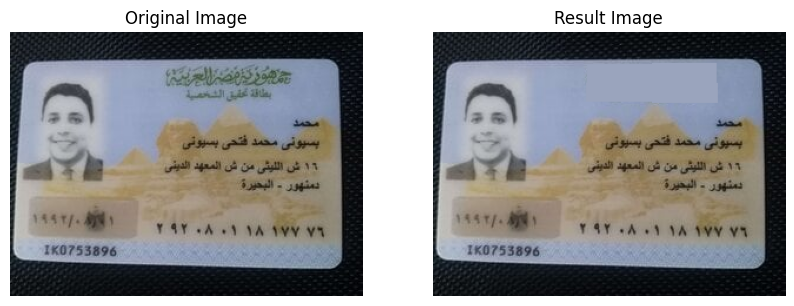

48.jpg


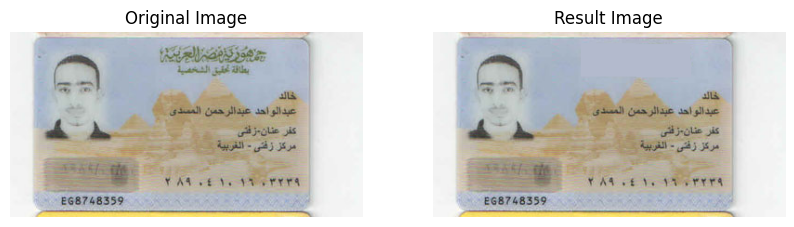

55.jpg


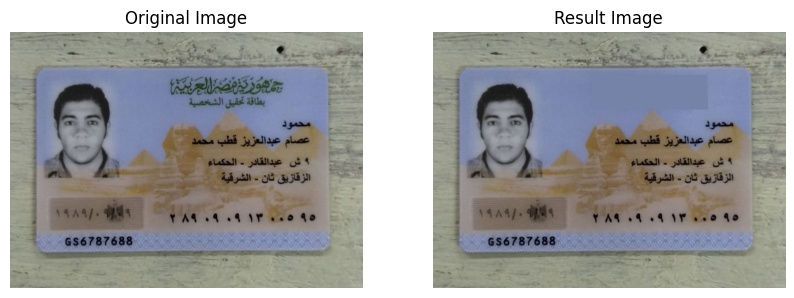

51.jpg


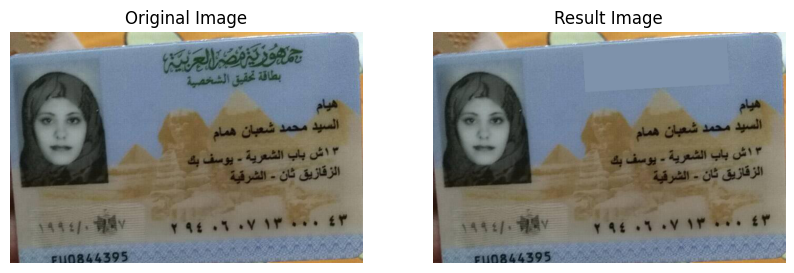

2.jpg


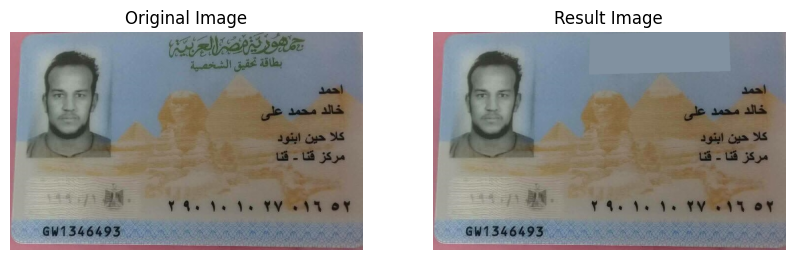

21.jpg


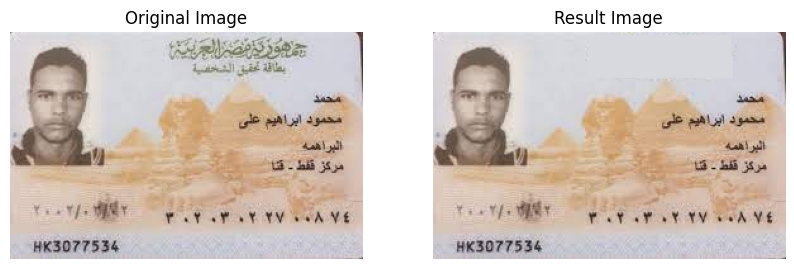

9.jpg


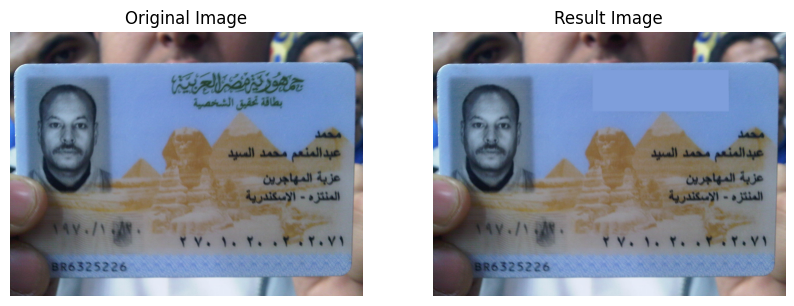

52.jpg


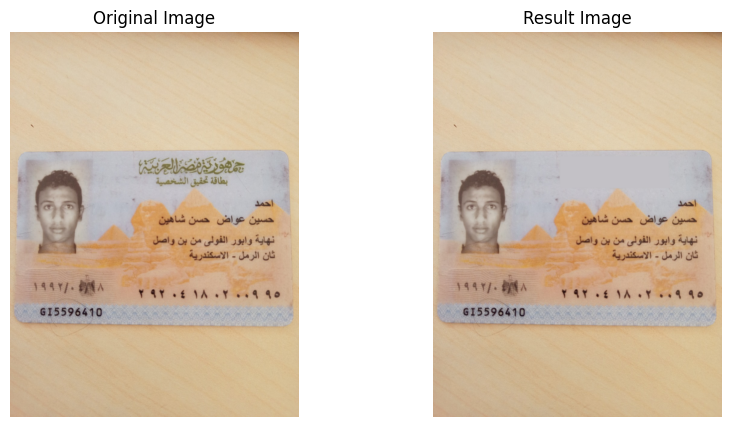

44.jpg


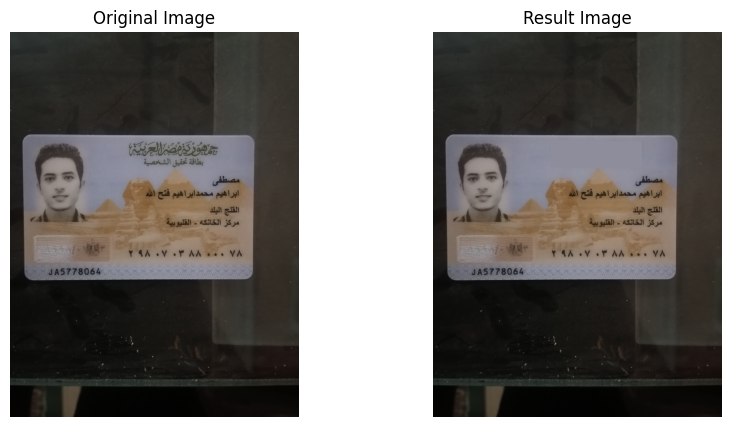

In [15]:

input_directory = '/content/remove-logo-from-image/testing_data/'
output_directory = '/content/processed_images/'

os.makedirs(output_directory, exist_ok=True)

image_paths = glob.glob(input_directory + '*.jpg')  # Adjust the extension if necessary

for input_path in image_paths:
    file_name = os.path.basename(input_path)
    print(file_name)
    output_path = os.path.join(output_directory, file_name)
    Process_image(input_path, output_path)
